In [661]:
# Importando todas as bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [662]:
# Lendo todos os DataSets com pandas
df_obesidade = pd.read_csv('./datasets/obesidade/data.csv', sep=',')
df_pib_pp = pd.read_csv('./datasets/pib_per_capita/GDP.csv', sep=',')

## Limpando DataFrame de obesidade

In [663]:
# Criando uma copia do DataFrame original para a manipulação dos dados
df_obesidade_copia = df_obesidade.copy()
df_obesidade_copia

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Venezuela (Bolivarian Republic of),25.6 [21.3-30.2],22.4 [16.4-28.9],28.6 [22.5-35.2],25.2 [21.0-29.5],22.0 [16.2-28.2],28.3 [22.4-34.6],24.8 [20.8-29.0],21.5 [16.0-27.4],27.9 [22.2-34.1],...,14.4 [8.4-21.4],10.3 [6.7-14.6],6.6 [3.2-11.7],14.0 [8.0-21.3],9.9 [6.3-14.3],6.3 [2.9-11.5],13.6 [7.5-21.0],9.6 [5.9-14.1],5.9 [2.7-11.2],13.2 [7.1-20.7]
194,Viet Nam,2.1 [1.4-3.1],1.6 [0.8-2.8],2.6 [1.5-4.2],2.0 [1.3-2.9],1.5 [0.8-2.5],2.4 [1.4-3.9],1.8 [1.2-2.6],1.3 [0.7-2.3],2.3 [1.3-3.6],...,0.2 [0.1-0.6],0.2 [0.1-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5],0.1 [0.1-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5],0.1 [0.0-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5]
195,Yemen,17.1 [13.3-21.3],12.0 [7.3-17.6],22.0 [16.0-28.4],16.5 [12.9-20.5],11.4 [7.0-16.7],21.3 [15.6-27.4],15.9 [12.4-19.6],10.8 [6.7-15.7],20.6 [15.2-26.4],...,4.8 [2.0-9.3],3.1 [1.5-5.7],1.3 [0.4-3.3],4.5 [1.9-9.2],2.9 [1.4-5.6],1.3 [0.3-3.2],4.3 [1.7-9.0],2.8 [1.3-5.4],1.2 [0.3-3.1],4.2 [1.5-8.9]
196,Zambia,8.1 [5.8-10.7],3.6 [1.7-6.5],12.4 [8.5-17.1],7.7 [5.6-10.2],3.4 [1.6-6.1],12.0 [8.2-16.4],7.4 [5.4-9.8],3.2 [1.5-5.7],11.5 [7.9-15.7],...,3.0 [1.3-5.6],1.7 [0.8-3.2],0.5 [0.1-1.5],2.9 [1.2-5.4],1.6 [0.7-3.1],0.5 [0.1-1.4],2.7 [1.1-5.3],1.5 [0.7-3.0],0.5 [0.1-1.4],2.5 [1.0-5.1]


In [664]:
# Verificando conteúdo completo da linha NaN [0,0], se os dados são relevantes 
df_obesidade_copia.iloc[0,1]

'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'

In [665]:
# Verificando colunas 
df_obesidade_copia.columns

Index(['Unnamed: 0', '2016', '2016.1', '2016.2', '2015', '2015.1', '2015.2',
       '2014', '2014.1', '2014.2',
       ...
       '1978.2', '1977', '1977.1', '1977.2', '1976', '1976.1', '1976.2',
       '1975', '1975.1', '1975.2'],
      dtype='object', length=127)

In [666]:
# Excluindo linhas irrelevantes para o estudo dos dados
df_obesidade_copia.drop([0,1,2],inplace=True)

# Resetando index
df_obesidade_copia.reset_index(drop=True,inplace=True)
df_obesidade_copia.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
1,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
2,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
3,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
4,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [667]:
# Renomeando coluna ['Unnamed: 0'] para ['Country'] ja que a coluna são dos países
df_obesidade_copia.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df_obesidade_copia.head()

,Country,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
1,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
2,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
3,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
4,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [668]:
df_obesidade_limpa = df_obesidade_copia.melt('Country', var_name='Year', value_name='Obesity (%)')
df_obesidade_limpa[['Year', 'Sex']] = df_obesidade_limpa['Year'].str.split('.', expand=True)
df_obesidade_limpa.head(10)

,Country,Year,Obesity (%),Sex
0,Afghanistan,2016,5.5 [3.4-8.1],None
1,Albania,2016,21.7 [17.0-26.7],None
2,Algeria,2016,27.4 [22.5-32.7],None
3,Andorra,2016,25.6 [20.1-31.3],None
4,Angola,2016,8.2 [5.1-12.2],None
5,Antigua and Barbuda,2016,18.9 [13.8-24.6],None
6,Argentina,2016,28.3 [23.4-33.5],None
7,Armenia,2016,20.2 [15.7-24.8],None
8,Australia,2016,29.0 [25.3-32.9],None
9,Austria,2016,20.1 [15.9-24.6],None


In [669]:
# Ordenando em em crescente
df_obesidade_limpa = df_obesidade_limpa.sort_values(by=['Country','Year'])
# Resetando index
df_obesidade_limpa = df_obesidade_limpa.reset_index(drop=True)
df_obesidade_limpa.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],None
1,Afghanistan,1975,0.2 [0.0-0.6],1
2,Afghanistan,1975,0.8 [0.2-2.0],2
3,Afghanistan,1976,0.5 [0.2-1.1],None
4,Afghanistan,1976,0.2 [0.0-0.7],1


In [670]:
# Renomeando valores de sexo com base na lógica do DataFrame
df_obesidade_limpa['Sex']=df_obesidade_limpa['Sex'].map({None: 'Both sexes', '1': 'Male', '2':'Female'})
# Excluindo a variância de obesidade para somente ficar a porcentagem
df_obesidade_limpa['Obesity (%)']=df_obesidade_limpa['Obesity (%)'].apply(lambda x:x.split()[0])
df_obesidade_limpa.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male


In [671]:
# Dando um info()
df_obesidade_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  object
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: object(4)
memory usage: 767.9+ KB


In [672]:
# Transformando coluna ['Obesity (%)'] para número
df_obesidade_limpa['Obesity (%)'] = pd.to_numeric(df_obesidade_limpa['Obesity (%)'], errors='coerce')
display(df_obesidade_limpa)
# Dando um info()
df_obesidade_limpa.info()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5,Male
24566,Zimbabwe,2015,24.8,Female
24567,Zimbabwe,2016,15.5,Both sexes
24568,Zimbabwe,2016,4.7,Male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24570 non-null  object 
 1   Year         24570 non-null  object 
 2   Obesity (%)  24066 non-null  float64
 3   Sex          24570 non-null  object 
dtypes: float64(1), object(3)
memory usage: 767.9+ KB


In [673]:
# Saber quantos valores vazios no DataFrame
df_obesidade_limpa.isnull().sum()

Country          0
Year             0
Obesity (%)    504
Sex              0
dtype: int64

In [674]:
# Filtrando paises que a coluna obesity está NaN
df_obesidade_NaN = df_obesidade_limpa[df_obesidade_limpa['Obesity (%)'].isnull()]
# Depois, agrupamos pelo país e obtemos os nomes dos países
df_obesidade_NaN['Country'].unique()

array(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype=object)

In [675]:
# Criando variável 
paises = df_obesidade_NaN['Country'].unique()

df_obesidade_paises_NaN = df_obesidade_limpa[df_obesidade_limpa['Country'].isin(paises)]
df_obesidade_paises_NaN['Obesity (%)'].isnull().all()

True

In [676]:
# Excluindo Linhas com valores vazios
df_obesidade_limpa = df_obesidade_limpa.dropna(how='any', axis=0)
df_obesidade_limpa = df_obesidade_limpa.reset_index(drop=True)
display(df_obesidade_limpa)
df_obesidade_limpa.info()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24061,Zimbabwe,2015,4.5,Male
24062,Zimbabwe,2015,24.8,Female
24063,Zimbabwe,2016,15.5,Both sexes
24064,Zimbabwe,2016,4.7,Male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  object 
 2   Obesity (%)  24066 non-null  float64
 3   Sex          24066 non-null  object 
dtypes: float64(1), object(3)
memory usage: 752.2+ KB


In [677]:
# Transformando em Data a coluna ['Year']
df_obesidade_limpa['Year'] = pd.to_datetime(df_obesidade_limpa['Year'], format='%Y').dt.year

In [678]:
# Dando um info()
df_obesidade_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  int32  
 2   Obesity (%)  24066 non-null  float64
 3   Sex          24066 non-null  object 
dtypes: float64(1), int32(1), object(2)
memory usage: 658.2+ KB


In [679]:
# DataFrame de Obesidade completamente limpa 
df_obesidade_limpa

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24061,Zimbabwe,2015,4.5,Male
24062,Zimbabwe,2015,24.8,Female
24063,Zimbabwe,2016,15.5,Both sexes
24064,Zimbabwe,2016,4.7,Male


In [680]:
# Renomeando Colunas para o português
df_obesidade_limpa.rename(columns={'Country': 'Paises',
                                   'Year': 'Anos',
                                   'Sex': 'Sexo',
                                   'Obesity (%)': 'Obesidade'}, inplace=True)
df_obesidade_limpa

,Paises,Anos,Obesidade,Sexo
0,Afghanistan,1975,0.5,Both sexes
1,Afghanistan,1975,0.2,Male
2,Afghanistan,1975,0.8,Female
3,Afghanistan,1976,0.5,Both sexes
4,Afghanistan,1976,0.2,Male
...,...,...,...,...
24061,Zimbabwe,2015,4.5,Male
24062,Zimbabwe,2015,24.8,Female
24063,Zimbabwe,2016,15.5,Both sexes
24064,Zimbabwe,2016,4.7,Male


In [681]:
df_obesidade_limpa['Paises'].replace('United States of America', 'United States', inplace=True)

 ## Comparando a taxa de obesidade por sexo

In [682]:
# Filtrando a média de obesidade por sexo e arredondando
obesidade_media_por_sexo = df_obesidade_limpa.groupby('Sexo')['Obesidade'].mean().round(2)
obesidade_media_por_sexo

Sexo
Both sexes    12.48
Female        15.53
Male           9.33
Name: Obesidade, dtype: float64

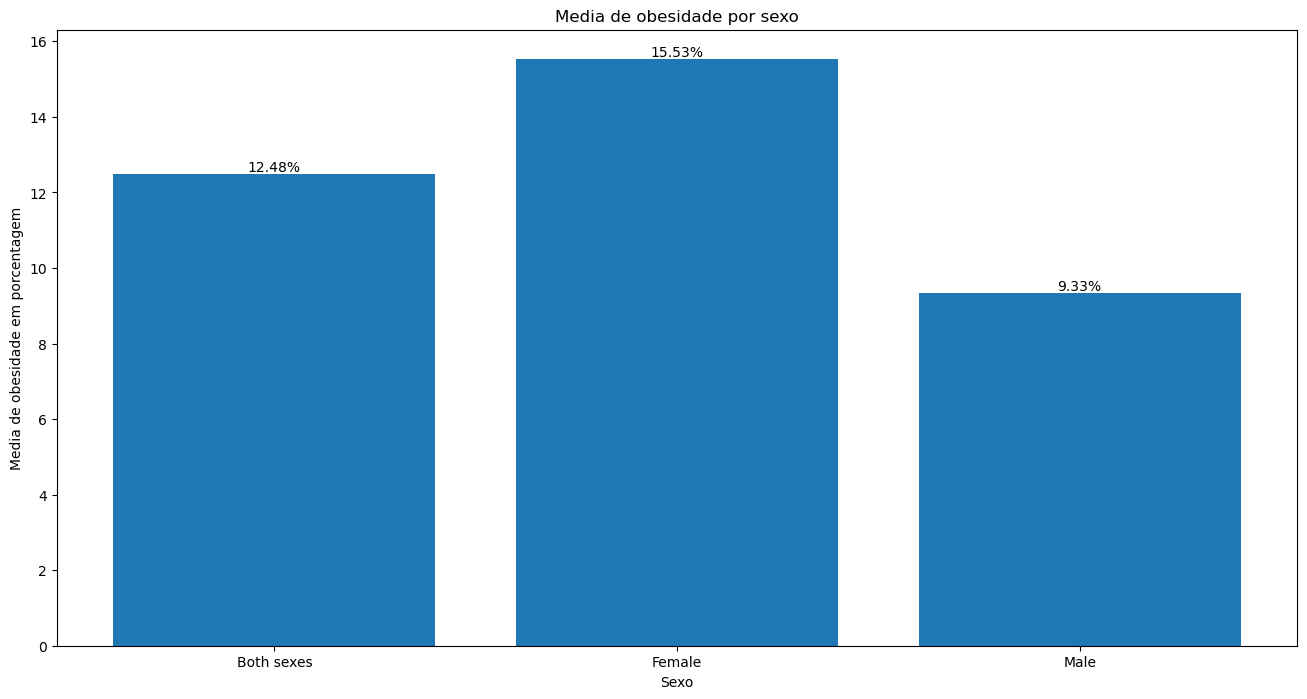

In [683]:
# Criando gráfico
fig, ax_sexo = plt.subplots(figsize=(16, 8))


barras_obesidade = plt.bar(obesidade_media_por_sexo.index, obesidade_media_por_sexo.values)

# Títulos e rótulos
plt.title('Media de obesidade por sexo')
plt.xlabel('Sexo')
plt.ylabel('Media de obesidade em porcentagem')
plt.xticks(fontsize=10)

# Valores em cima das barras
for barra in barras_obesidade:
    altura = barra.get_height()
    ax_sexo.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

plt.show()

## Calculando a percentual médio de obesidade por sexo na américa do norte em 2010

In [684]:
# Filtrando países da América do norte
paises_desejados = ['Mexico', 'Canada', 'United States']

# Filtrando DataFrame para ano de 2010, paises desejados e ambos sexos
df_obesidade_2010_NA = df_obesidade_limpa[(df_obesidade_limpa['Anos'] == 2010) & (df_obesidade_limpa['Paises'].isin(paises_desejados)) & (df_obesidade_limpa['Sexo'] == 'Both sexes')]
df_obesidade_2010_NA

,Paises,Anos,Obesidade,Sexo
4011,Canada,2010,26.0,Both sexes
13965,Mexico,2010,25.8,Both sexes
23037,United States,2010,32.3,Both sexes


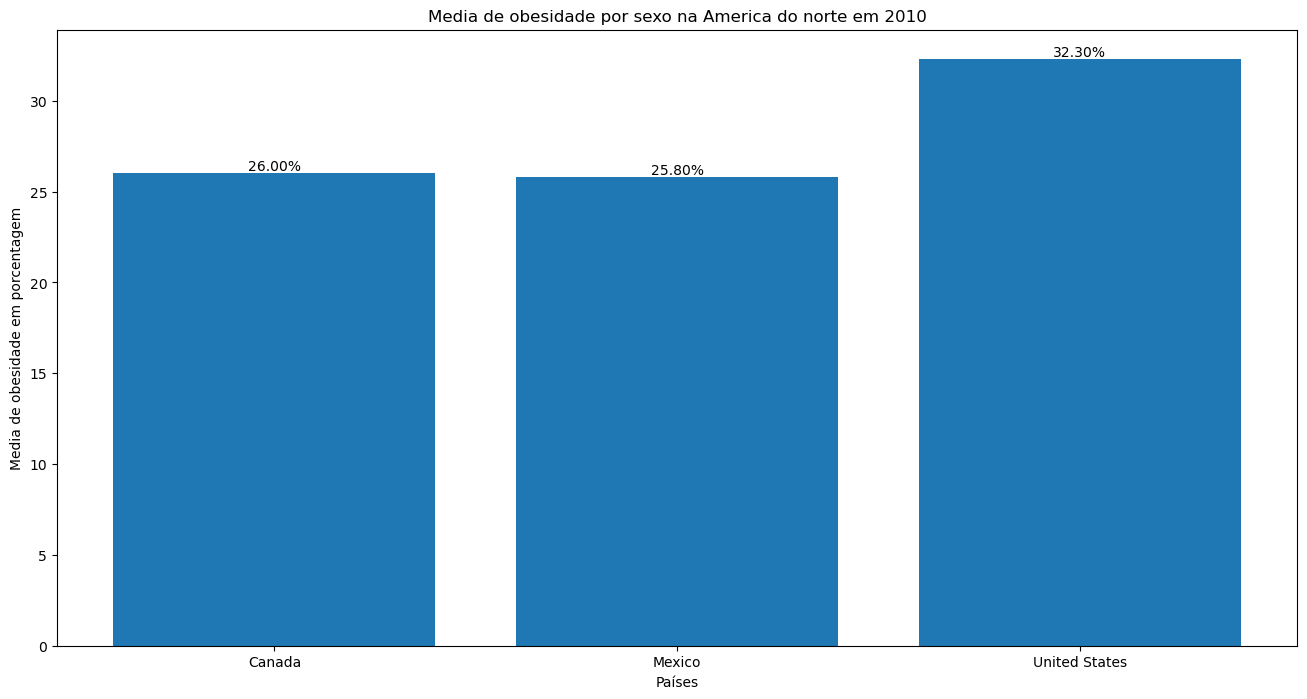

In [685]:
# Criando gráfico
fig, ax_sexo_Na_2010 = plt.subplots(figsize=(16, 8))

# Definindo eixo x e y
barras_2010_Na = plt.bar(df_obesidade_2010_NA['Paises'], df_obesidade_2010_NA['Obesidade'])

# Títulos e rótulos
plt.title('Media de obesidade por sexo na America do norte em 2010')
plt.xlabel('Países')
plt.ylabel('Media de obesidade em porcentagem')
plt.xticks(fontsize=10)

# Valores em cima das barras
for barra in barras_2010_Na:
    altura = barra.get_height()
    ax_sexo_Na_2010.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

# Ver gráfico
plt.show()

In [686]:
# Filtrando DataFrame df_obesidade_limpa para ambos os sexos e países do Na
df_obesidade_ambos_sexos_Na = df_obesidade_limpa[(df_obesidade_limpa['Paises'].isin(paises_desejados)) & (df_obesidade_limpa['Sexo'] == 'Both sexes')].copy()
# Calculando percentual de crescimento no DataFrame df_obesidade_ambos_sexos_Na
df_obesidade_ambos_sexos_Na['crescimento_obesidade'] = round(df_obesidade_ambos_sexos_Na.groupby('Paises')['Obesidade'].pct_change() * 100 , 2)
# Filtrando somente a taxa de crescimento no ano de 2010
df_obesidade_2010_Na_crescimento = df_obesidade_ambos_sexos_Na[df_obesidade_ambos_sexos_Na['Anos'] == 2010]
# Ordenando do maior para o menor
df_obesidade_2010_Na_crescimento = df_obesidade_2010_Na_crescimento.sort_values('crescimento_obesidade', ascending=False)
df_obesidade_2010_Na_crescimento

,Paises,Anos,Obesidade,Sexo,crescimento_obesidade
13965,Mexico,2010,25.8,Both sexes,1.98
4011,Canada,2010,26.0,Both sexes,1.96
23037,United States,2010,32.3,Both sexes,1.89


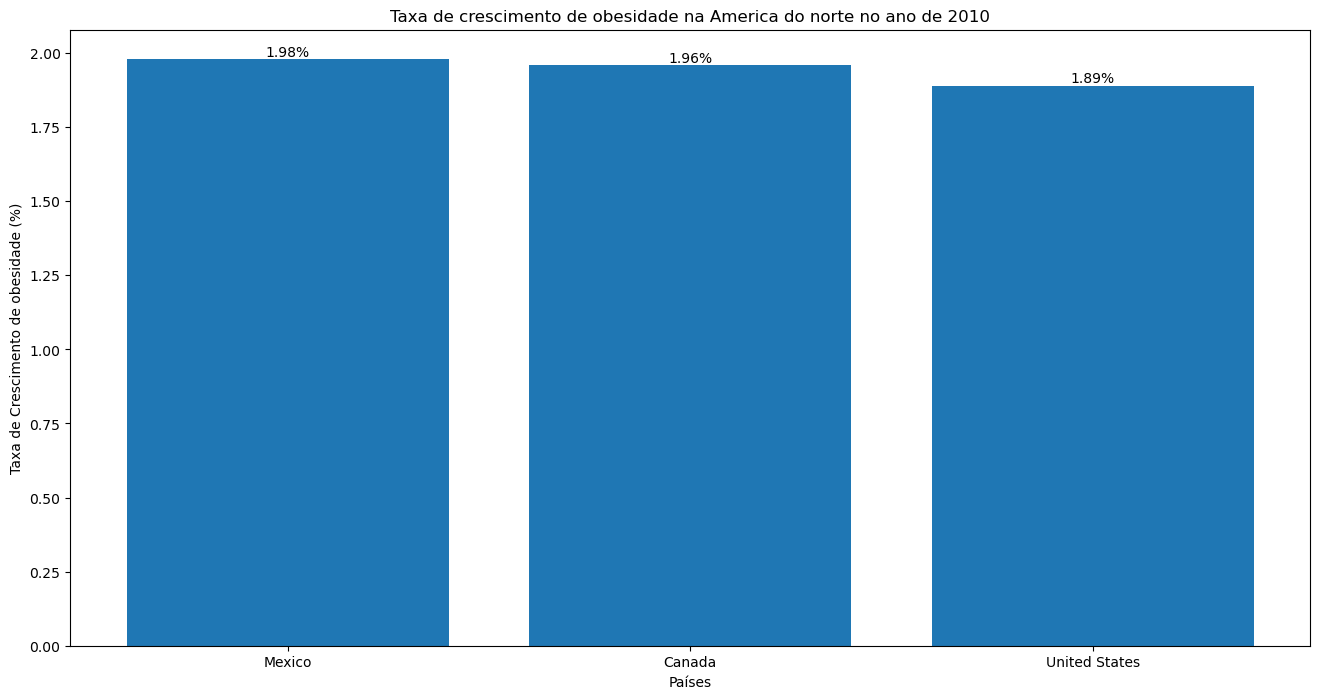

In [687]:
# Definir os valores para o eixo X e Y
paises = df_obesidade_2010_Na_crescimento['Paises']
crescimento = df_obesidade_2010_Na_crescimento['crescimento_obesidade']

# Criar a figura e o eixo
fig, ax_crescimento_Na_2010 = plt.subplots(figsize=(16, 8))

# Criar o gráfico de barras
barras_crescimento_Na_2010 = ax_crescimento_Na_2010.bar(paises, crescimento)

# Adicionar títulos e rótulos
ax_crescimento_Na_2010.set_title('Taxa de crescimento de obesidade na America do norte no ano de 2010')
ax_crescimento_Na_2010.set_xlabel('Países')
ax_crescimento_Na_2010.set_ylabel('Taxa de Crescimento de obesidade (%)')

# Girar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=0)

# Valores em cima das barras
for barra in barras_crescimento_Na_2010:
    altura = barra.get_height()
    ax_crescimento_Na_2010.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

 ## Top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010 e em 2016

### 2010

In [688]:
# Filtrando a pelo ano de 2010
df_obesidade_2010 = df_obesidade_limpa[(df_obesidade_limpa['Anos'] == 2010) & (df_obesidade_limpa['Sexo'] == 'Both sexes')]

# Filtrando top 3 com maior e menor em 2010
top_3_obesidade_maior_2010 = df_obesidade_2010.sort_values('Obesidade', ascending=False).head(3)
top_3_obesidade_menor_2010 = df_obesidade_2010.sort_values('Obesidade', ascending=False).tail(3)
display(top_3_obesidade_maior_2010)
display(top_3_obesidade_menor_2010)

,Paises,Anos,Obesidade,Sexo
14973,Nauru,2010,58.9,Both sexes
5019,Cook Islands,2010,52.6,Both sexes
16359,Palau,2010,51.8,Both sexes


,Paises,Anos,Obesidade,Sexo
21399,Timor-Leste,2010,2.6,Both sexes
1743,Bangladesh,2010,2.5,Both sexes
23667,Viet Nam,2010,1.4,Both sexes


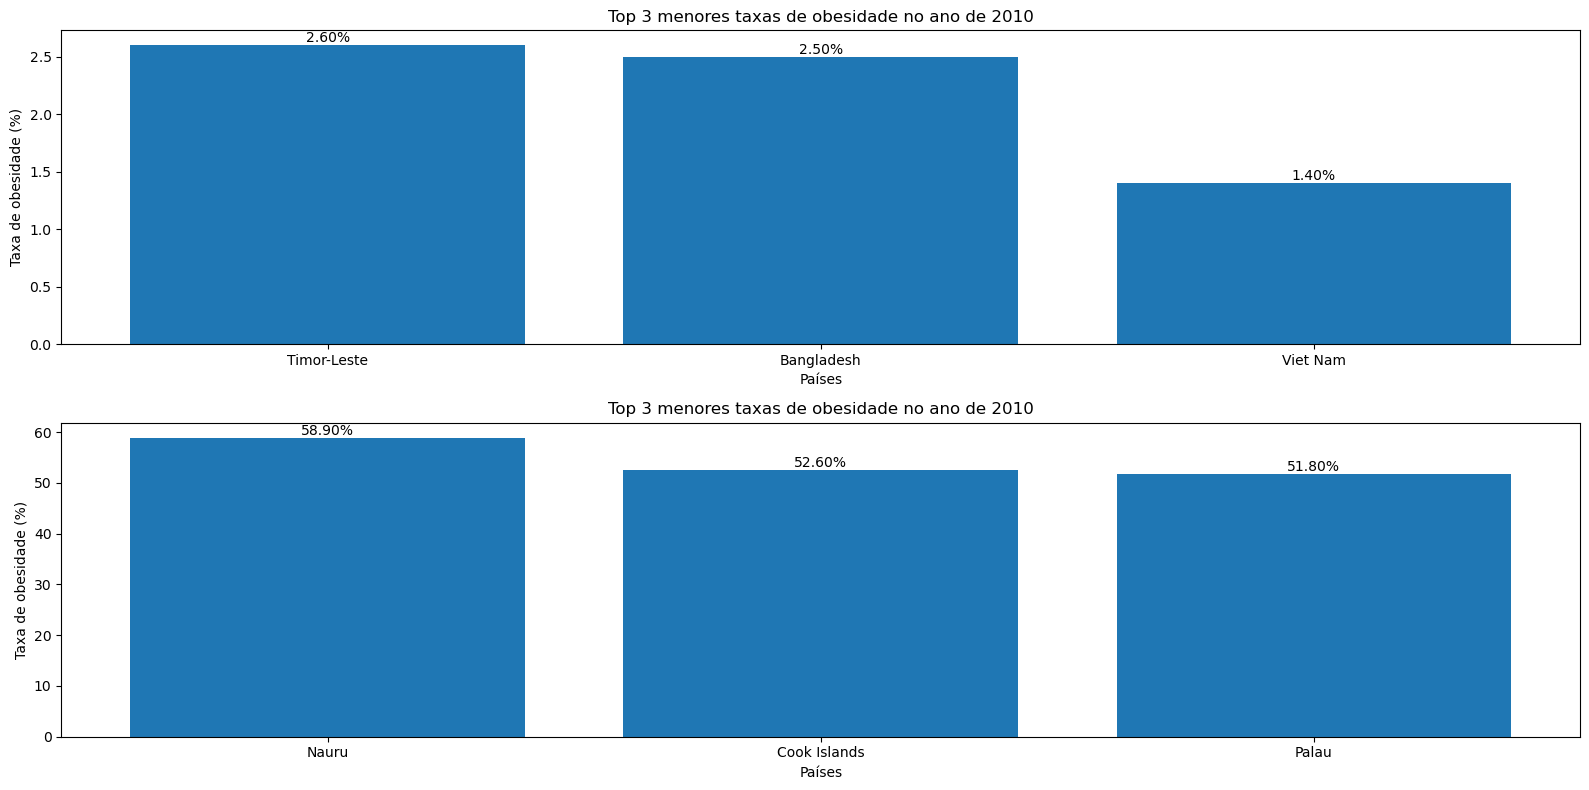

In [689]:
fig, (ax_obesidade_2010_menor, ax_obesidade_2010_maior) = plt.subplots(2, 1 , figsize=(16, 8))

barras_obesidade_2010_menor = ax_obesidade_2010_menor.bar(top_3_obesidade_menor_2010['Paises'], top_3_obesidade_menor_2010['Obesidade'])
barras_obesidade_2010_maior = ax_obesidade_2010_maior.bar(top_3_obesidade_maior_2010['Paises'], top_3_obesidade_maior_2010['Obesidade'])

# Adicionar títulos e rótulos menor
ax_obesidade_2010_menor.set_title('Top 3 menores taxas de obesidade no ano de 2010')
ax_obesidade_2010_menor.set_xlabel('Países')
ax_obesidade_2010_menor.set_ylabel('Taxa de obesidade (%)')

# Adicionar títulos e rótulos maior
ax_obesidade_2010_maior.set_title('Top 3 menores taxas de obesidade no ano de 2010')
ax_obesidade_2010_maior.set_xlabel('Países')
ax_obesidade_2010_maior.set_ylabel('Taxa de obesidade (%)')

# Valores em cima das barras
for barra in barras_obesidade_2010_menor:
    altura = barra.get_height()
    ax_obesidade_2010_menor.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')
    
# Valores em cima das barras
for barra in barras_obesidade_2010_maior:
    altura = barra.get_height()
    ax_obesidade_2010_maior.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [690]:
df_obesidade_ambos_sexos = df_obesidade_limpa[df_obesidade_limpa['Sexo'] == 'Both sexes'].copy()
df_obesidade_ambos_sexos['Crescimento_obesidade'] = round(df_obesidade_ambos_sexos.groupby('Paises')['Obesidade'].pct_change() * 100 , 2)
df_obesidade_2010_crescimento = df_obesidade_ambos_sexos[df_obesidade_ambos_sexos['Anos'] == 2010]
df_obesidade_2010_crescimento = df_obesidade_2010_crescimento.sort_values('Crescimento_obesidade', ascending=False)

df_obesidade_2010_crescimento_maior = df_obesidade_2010_crescimento.head(3)
df_obesidade_2010_crescimento_menor = df_obesidade_2010_crescimento.tail(3)

display(df_obesidade_2010_crescimento_maior)
display(df_obesidade_2010_crescimento_menor)


,Paises,Anos,Obesidade,Sexo,Crescimento_obesidade
20517,Sudan (former),2010,6.5,Both sexes,27.45
1743,Bangladesh,2010,2.5,Both sexes,8.70
21399,Timor-Leste,2010,2.6,Both sexes,8.33


,Paises,Anos,Obesidade,Sexo,Crescimento_obesidade
17997,Russian Federation,2010,21.4,Both sexes,0.94
483,Andorra,2010,24.4,Both sexes,0.83
14973,Nauru,2010,58.9,Both sexes,0.68


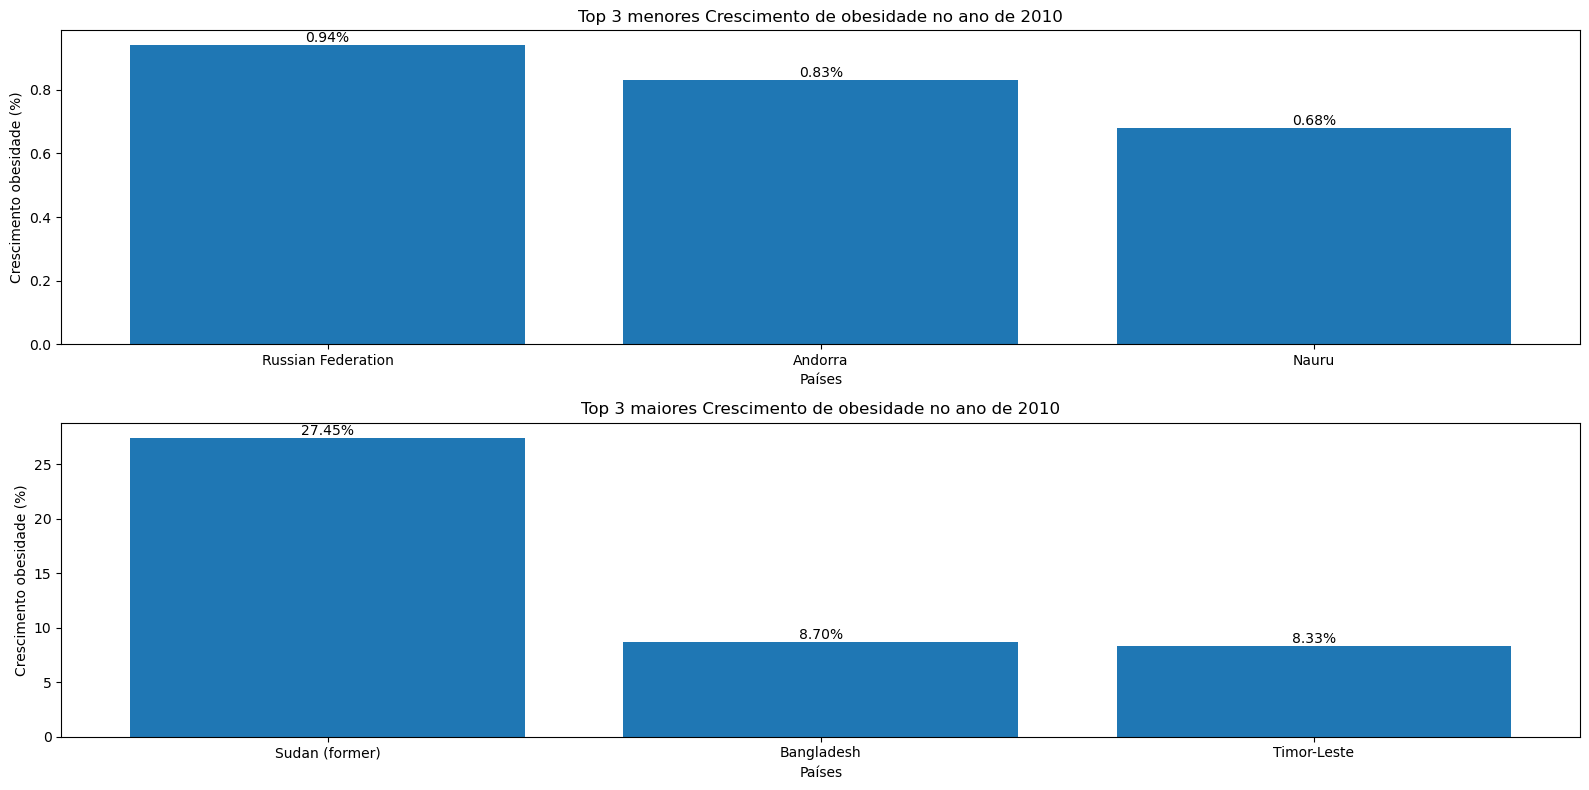

In [691]:
fig, (ax_obesidade_crescimento_2010_menor, ax_obesidade_crescimento_2010_maior) = plt.subplots(2, 1 , figsize=(16, 8))

barras_obesidade_crescimento_2010_menor = ax_obesidade_crescimento_2010_menor.bar(df_obesidade_2010_crescimento_menor['Paises'], df_obesidade_2010_crescimento_menor['Crescimento_obesidade'])
barras_obesidade_crescimento_2010_maior = ax_obesidade_crescimento_2010_maior.bar(df_obesidade_2010_crescimento_maior['Paises'], df_obesidade_2010_crescimento_maior['Crescimento_obesidade'])

# Adicionar títulos e rótulos menor
ax_obesidade_crescimento_2010_menor.set_title('Top 3 menores Crescimento de obesidade no ano de 2010')
ax_obesidade_crescimento_2010_menor.set_xlabel('Países')
ax_obesidade_crescimento_2010_menor.set_ylabel('Crescimento obesidade (%)')

# Adicionar títulos e rótulos maior
ax_obesidade_crescimento_2010_maior.set_title('Top 3 maiores Crescimento de obesidade no ano de 2010')
ax_obesidade_crescimento_2010_maior.set_xlabel('Países')
ax_obesidade_crescimento_2010_maior.set_ylabel('Crescimento obesidade (%)')

# Valores em cima das barras
for barra in barras_obesidade_crescimento_2010_menor:
    altura = barra.get_height()
    ax_obesidade_crescimento_2010_menor.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')
    
# Valores em cima das barras
for barra in barras_obesidade_crescimento_2010_maior:
    altura = barra.get_height()
    ax_obesidade_crescimento_2010_maior.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2016

In [692]:
# Filtrando a pelo ano de 2016
df_obesidade_2016 = df_obesidade_limpa[(df_obesidade_limpa['Anos'] == 2016) & (df_obesidade_limpa['Sexo'] == 'Both sexes')]

# Filtrando top 3 com maior e menor taxa de obesidade em 2016
top_3_obesidade_maior_2016 = df_obesidade_2016.sort_values('Obesidade', ascending=False).head(3)
top_3_obesidade_menor_2016 = df_obesidade_2016.sort_values('Obesidade', ascending=False).tail(3)
display(top_3_obesidade_maior_2016)
display(top_3_obesidade_menor_2016)

,Paises,Anos,Obesidade,Sexo
14991,Nauru,2016,61.0,Both sexes
5037,Cook Islands,2016,55.9,Both sexes
16377,Palau,2016,55.3,Both sexes


,Paises,Anos,Obesidade,Sexo
21417,Timor-Leste,2016,3.8,Both sexes
1761,Bangladesh,2016,3.6,Both sexes
23685,Viet Nam,2016,2.1,Both sexes


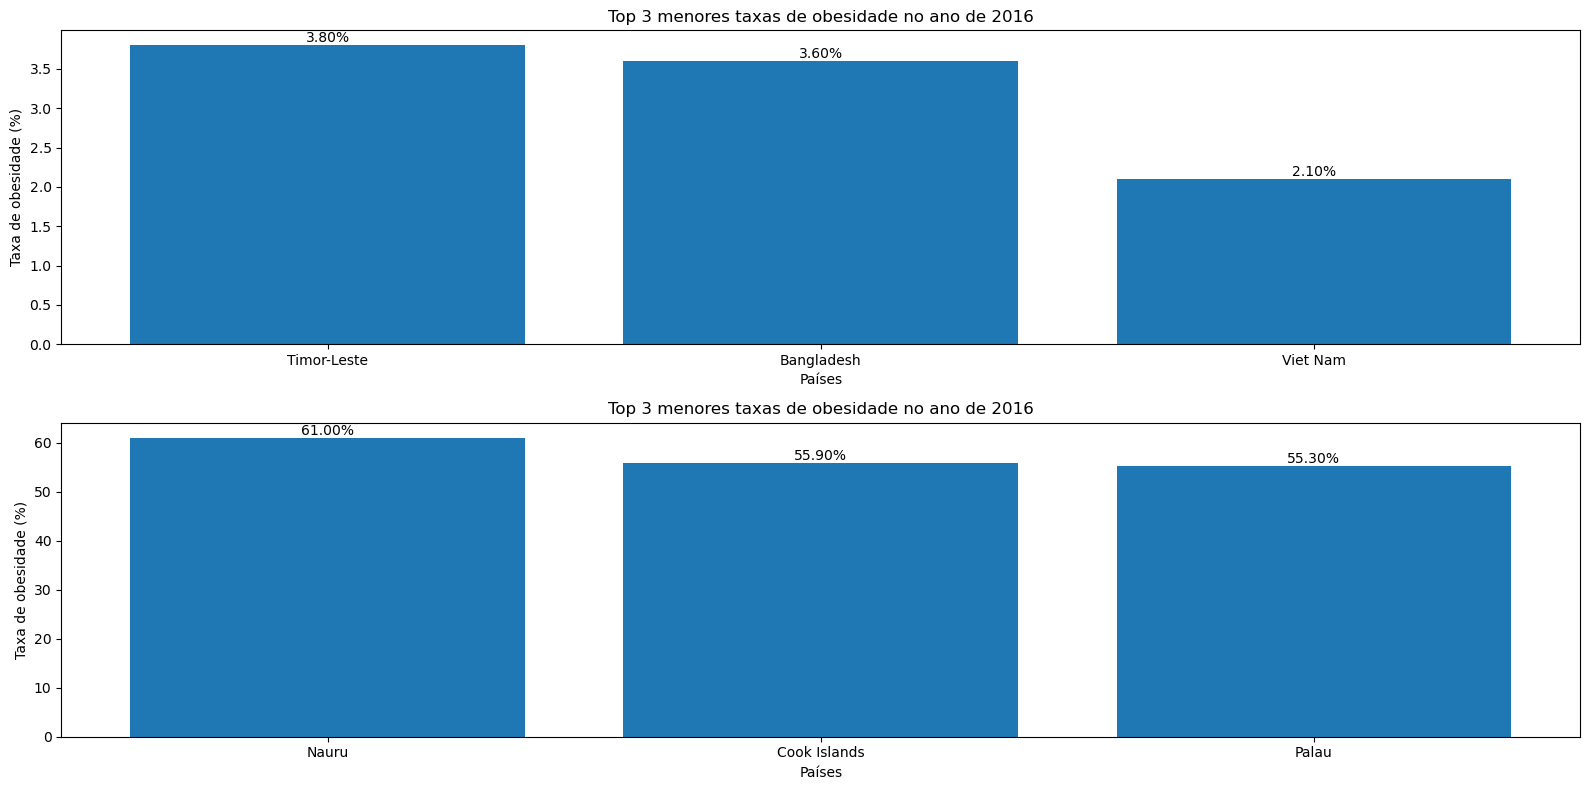

In [693]:
fig, (ax_obesidade_2016_menor, ax_obesidade_2016_maior) = plt.subplots(2, 1 , figsize=(16, 8))

barras_obesidade_2016_menor = ax_obesidade_2016_menor.bar(top_3_obesidade_menor_2016['Paises'], top_3_obesidade_menor_2016['Obesidade'])
barras_obesidade_2016_maior = ax_obesidade_2016_maior.bar(top_3_obesidade_maior_2016['Paises'], top_3_obesidade_maior_2016['Obesidade'])

# Adicionar títulos e rótulos menor
ax_obesidade_2016_menor.set_title('Top 3 menores taxas de obesidade no ano de 2016')
ax_obesidade_2016_menor.set_xlabel('Países')
ax_obesidade_2016_menor.set_ylabel('Taxa de obesidade (%)')

# Adicionar títulos e rótulos maior
ax_obesidade_2016_maior.set_title('Top 3 menores taxas de obesidade no ano de 2016')
ax_obesidade_2016_maior.set_xlabel('Países')
ax_obesidade_2016_maior.set_ylabel('Taxa de obesidade (%)')

# Valores em cima das barras
for barra in barras_obesidade_2016_menor:
    altura = barra.get_height()
    ax_obesidade_2016_menor.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')
    
# Valores em cima das barras
for barra in barras_obesidade_2016_maior:
    altura = barra.get_height()
    ax_obesidade_2016_maior.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [694]:
df_obesidade_ambos_sexos = df_obesidade_limpa[df_obesidade_limpa['Sexo'] == 'Both sexes'].copy()
df_obesidade_ambos_sexos['Crescimento_obesidade'] = round(df_obesidade_ambos_sexos.groupby('Paises')['Obesidade'].pct_change() * 100 , 2)
df_obesidade_2016_crescimento = df_obesidade_ambos_sexos[df_obesidade_ambos_sexos['Anos'] == 2016]
df_obesidade_2016_crescimento = df_obesidade_2016_crescimento.sort_values('Crescimento_obesidade', ascending=False)

df_obesidade_2016_crescimento_maior = df_obesidade_2016_crescimento.head(3)
df_obesidade_2016_crescimento_menor = df_obesidade_2016_crescimento.tail(3)

display(df_obesidade_2016_crescimento_maior)
display(df_obesidade_2016_crescimento_menor)

,Paises,Anos,Obesidade,Sexo,Crescimento_obesidade
14739,Myanmar,2016,5.8,Both sexes,7.41
21291,Thailand,2016,10.0,Both sexes,6.38
13227,Maldives,2016,8.6,Both sexes,6.17


,Paises,Anos,Obesidade,Sexo,Crescimento_obesidade
501,Andorra,2016,25.6,Both sexes,0.79
14991,Nauru,2016,61.0,Both sexes,0.49
20535,Sudan (former),2016,8.6,Both sexes,0.00


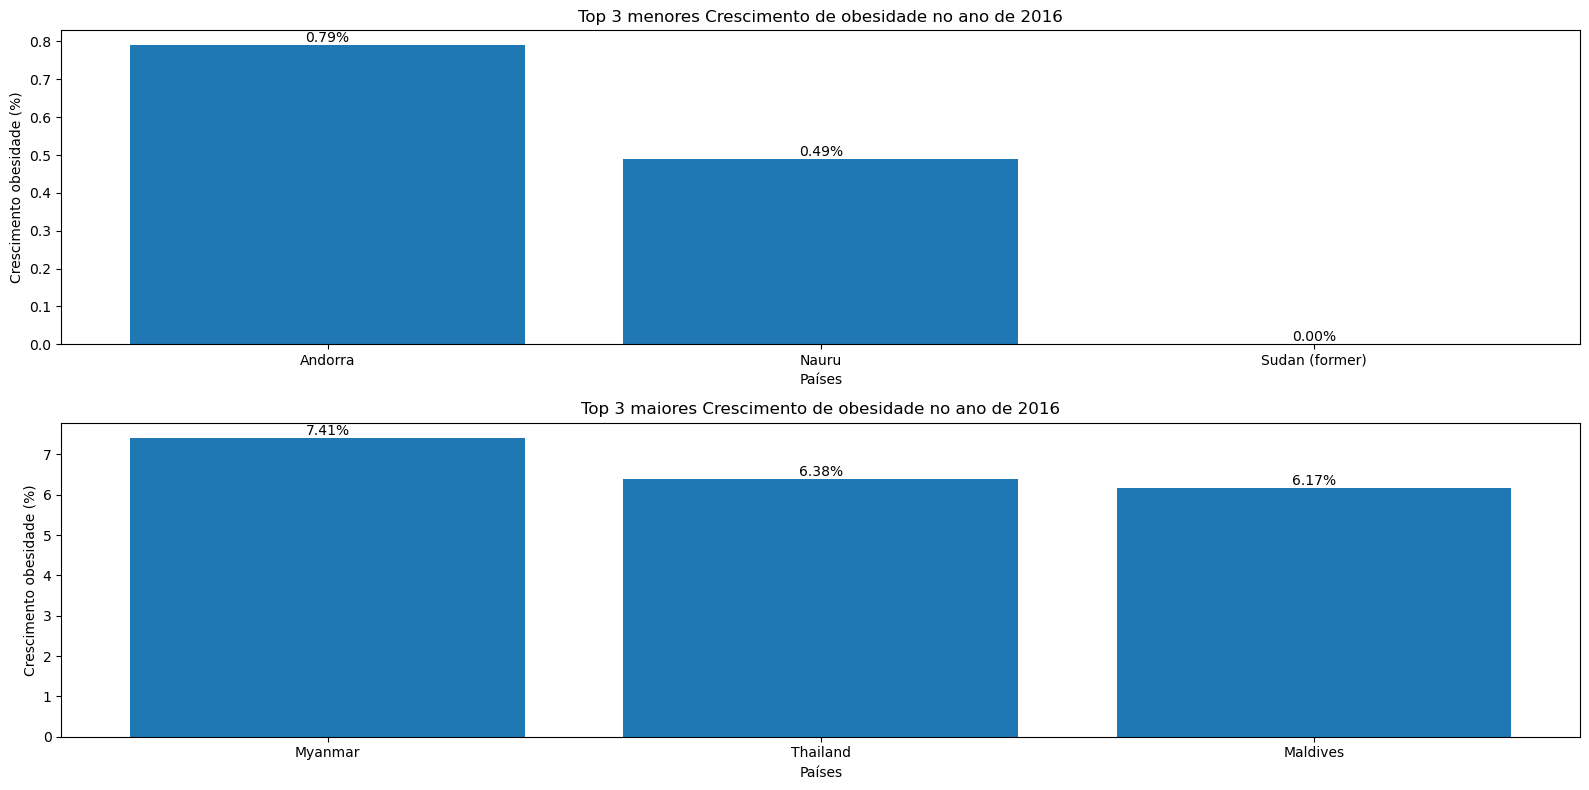

In [695]:
fig, (ax_obesidade_crescimento_2016_menor, ax_obesidade_crescimento_2016_maior) = plt.subplots(2, 1 , figsize=(16, 8))

barras_obesidade_crescimento_2016_menor = ax_obesidade_crescimento_2016_menor.bar(df_obesidade_2016_crescimento_menor['Paises'], df_obesidade_2016_crescimento_menor['Crescimento_obesidade'])
barras_obesidade_crescimento_2016_maior = ax_obesidade_crescimento_2016_maior.bar(df_obesidade_2016_crescimento_maior['Paises'], df_obesidade_2016_crescimento_maior['Crescimento_obesidade'])

# Adicionar títulos e rótulos menor
ax_obesidade_crescimento_2016_menor.set_title('Top 3 menores Crescimento de obesidade no ano de 2016')
ax_obesidade_crescimento_2016_menor.set_xlabel('Países')
ax_obesidade_crescimento_2016_menor.set_ylabel('Crescimento obesidade (%)')

# Adicionar títulos e rótulos maior
ax_obesidade_crescimento_2016_maior.set_title('Top 3 maiores Crescimento de obesidade no ano de 2016')
ax_obesidade_crescimento_2016_maior.set_xlabel('Países')
ax_obesidade_crescimento_2016_maior.set_ylabel('Crescimento obesidade (%)')

# Valores em cima das barras
for barra in barras_obesidade_crescimento_2016_menor:
    altura = barra.get_height()
    ax_obesidade_crescimento_2016_menor.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')
    
# Valores em cima das barras
for barra in barras_obesidade_crescimento_2016_maior:
    altura = barra.get_height()
    ax_obesidade_crescimento_2016_maior.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Top 3 com maior e menor taxa de aumento de índices de obesidade em todo período

In [696]:
df_obesidade_ambos_sexos = df_obesidade_limpa[df_obesidade_limpa['Sexo'] == 'Both sexes'].copy()
df_obesidade_ambos_sexos['Crescimento_obesidade'] = round(df_obesidade_ambos_sexos.groupby('Paises')['Obesidade'].pct_change() * 100 , 2)
media_de_crescimento =  df_obesidade_ambos_sexos.groupby('Paises')['Crescimento_obesidade'].mean().round(2).sort_values(ascending=False)

top3_maior_media_de_crescimento = media_de_crescimento.head(3)
top3_menor_media_de_crescimento = media_de_crescimento.tail(3)

display(top3_maior_media_de_crescimento)
display(top3_menor_media_de_crescimento)

Paises
Viet Nam          8.78
Sudan (former)    8.25
Timor-Leste       7.83
Name: Crescimento_obesidade, dtype: float64

Paises
Estonia               1.26
Russian Federation    1.25
Nauru                 0.77
Name: Crescimento_obesidade, dtype: float64

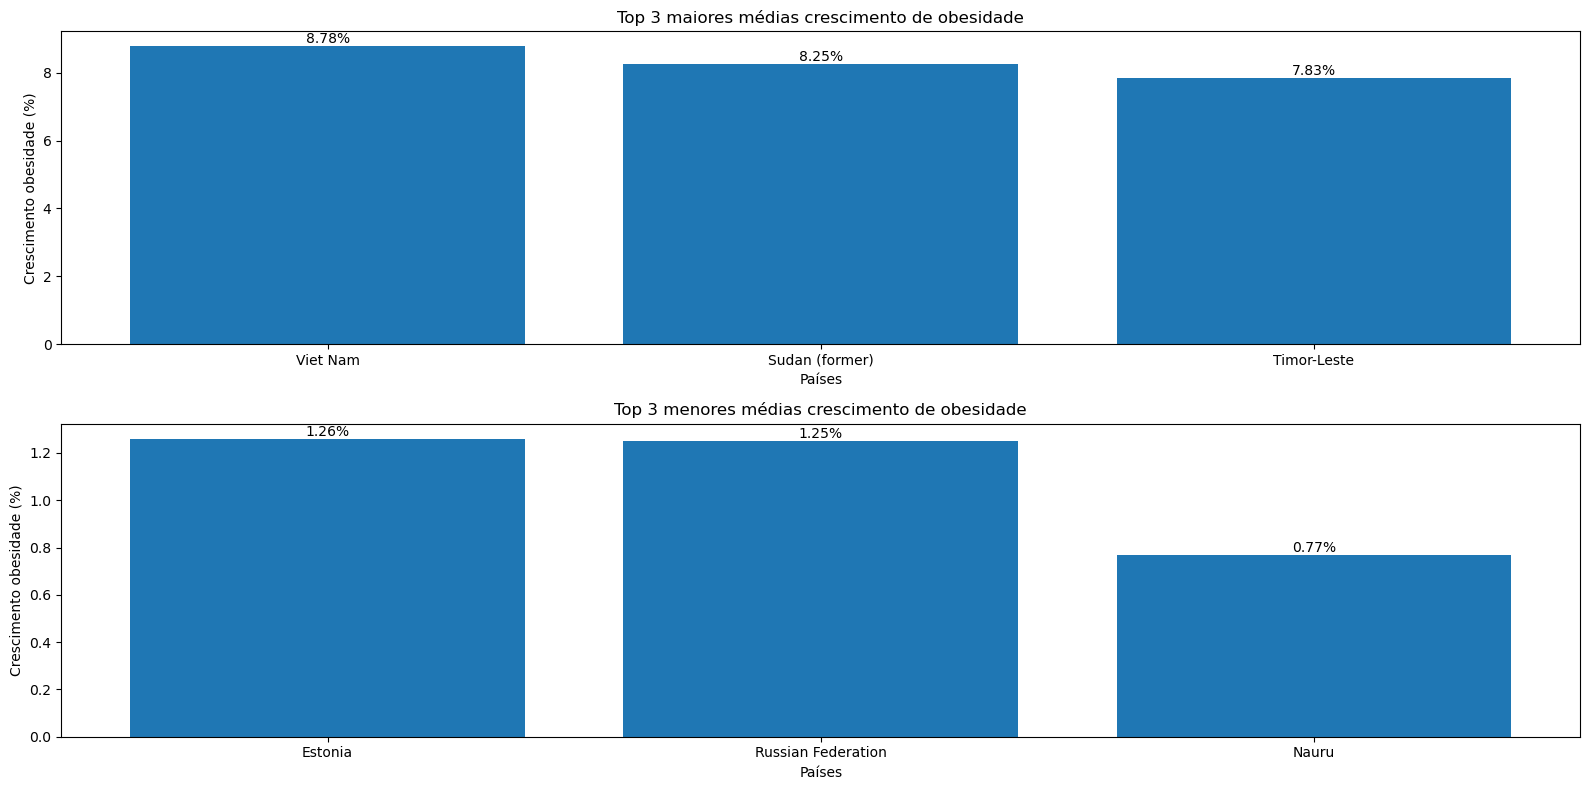

In [697]:
fig, (ax_media_crescimento_maior, ax_media_crescimento_menor) = plt.subplots(2, 1 ,figsize=(16, 8))

barras_obesidade_media_crescimento_menor = ax_media_crescimento_menor.bar(top3_menor_media_de_crescimento.index, top3_menor_media_de_crescimento.values)
barras_obesidade_media_crescimento_maior = ax_media_crescimento_maior.bar(top3_maior_media_de_crescimento.index, top3_maior_media_de_crescimento.values)

# Adicionar títulos e rótulos menor
ax_media_crescimento_menor.set_title('Top 3 menores médias crescimento de obesidade')
ax_media_crescimento_menor.set_xlabel('Países')
ax_media_crescimento_menor.set_ylabel('Crescimento obesidade (%)')

# Adicionar títulos e rótulos maior
ax_media_crescimento_maior.set_title('Top 3 maiores médias crescimento de obesidade')
ax_media_crescimento_maior.set_xlabel('Países')
ax_media_crescimento_maior.set_ylabel('Crescimento obesidade (%)')

# Valores em cima das barras
for barra in barras_obesidade_media_crescimento_menor:
    altura = barra.get_height()
    ax_media_crescimento_menor.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')
    
# Valores em cima das barras
for barra in barras_obesidade_media_crescimento_maior:
    altura = barra.get_height()
    ax_media_crescimento_maior.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')


plt.tight_layout()
plt.show()

## Extração do máximo de informação possível sobre o Brasil. Usando gráfico para apresentar

In [698]:
# Filtrando DataFrame so para mostrar dados do Brasil
df_obesidade_brasil = df_obesidade_limpa[df_obesidade_limpa['Paises'] == 'Brazil'].copy()
df_obesidade_brasil

,Paises,Anos,Obesidade,Sexo
2898,Brazil,1975,5.2,Both sexes
2899,Brazil,1975,3.0,Male
2900,Brazil,1975,7.3,Female
2901,Brazil,1976,5.5,Both sexes
2902,Brazil,1976,3.2,Male
...,...,...,...,...
3019,Brazil,2015,18.0,Male
3020,Brazil,2015,24.9,Female
3021,Brazil,2016,22.1,Both sexes
3022,Brazil,2016,18.5,Male


In [699]:
df_obesidade_brasil_mulheres = df_obesidade_brasil[df_obesidade_brasil['Sexo'] == 'Female'].copy()
df_obesidade_brasil_homens = df_obesidade_brasil[df_obesidade_brasil['Sexo'] == 'Male'].copy()
df_obesidade_brasil_ambos_sexos = df_obesidade_brasil[df_obesidade_brasil['Sexo'] == 'Both sexes'].copy()

In [700]:
df_obesidade_brasil_mulheres['Crescimento_obesidade'] = round(df_obesidade_brasil_mulheres.groupby('Sexo')['Obesidade'].pct_change() * 100, 2)
df_obesidade_brasil_homens['Crescimento_obesidade'] = round(df_obesidade_brasil_homens.groupby('Sexo')['Obesidade'].pct_change() * 100, 2)
df_obesidade_brasil_ambos_sexos['Crescimento_obesidade'] = round(df_obesidade_brasil_ambos_sexos.groupby('Sexo')['Obesidade'].pct_change() * 100, 2)

In [701]:
display(df_obesidade_brasil_mulheres[['Obesidade', 'Crescimento_obesidade']].describe().round(2))
display(df_obesidade_brasil_homens[['Obesidade', 'Crescimento_obesidade']].describe().round(2))
display(df_obesidade_brasil_ambos_sexos[['Obesidade', 'Crescimento_obesidade']].describe().round(2))

,Obesidade,Crescimento_obesidade
count,42.00,41.00
mean,15.85,3.09
std,5.51,0.86
min,7.30,1.78
25%,11.10,2.33
50%,15.55,3.05
75%,20.48,3.70
max,25.40,5.26


,Obesidade,Crescimento_obesidade
count,42.00,41.00
mean,9.67,4.54
std,4.75,1.30
min,3.00,2.74
25%,5.48,3.36
50%,9.10,4.39
75%,13.58,5.56
max,18.50,7.89


,Obesidade,Crescimento_obesidade
count,42.00,41.00
mean,12.88,3.60
std,5.17,0.98
min,5.20,2.08
25%,8.38,2.75
50%,12.45,3.61
75%,17.18,4.26
max,22.10,5.77


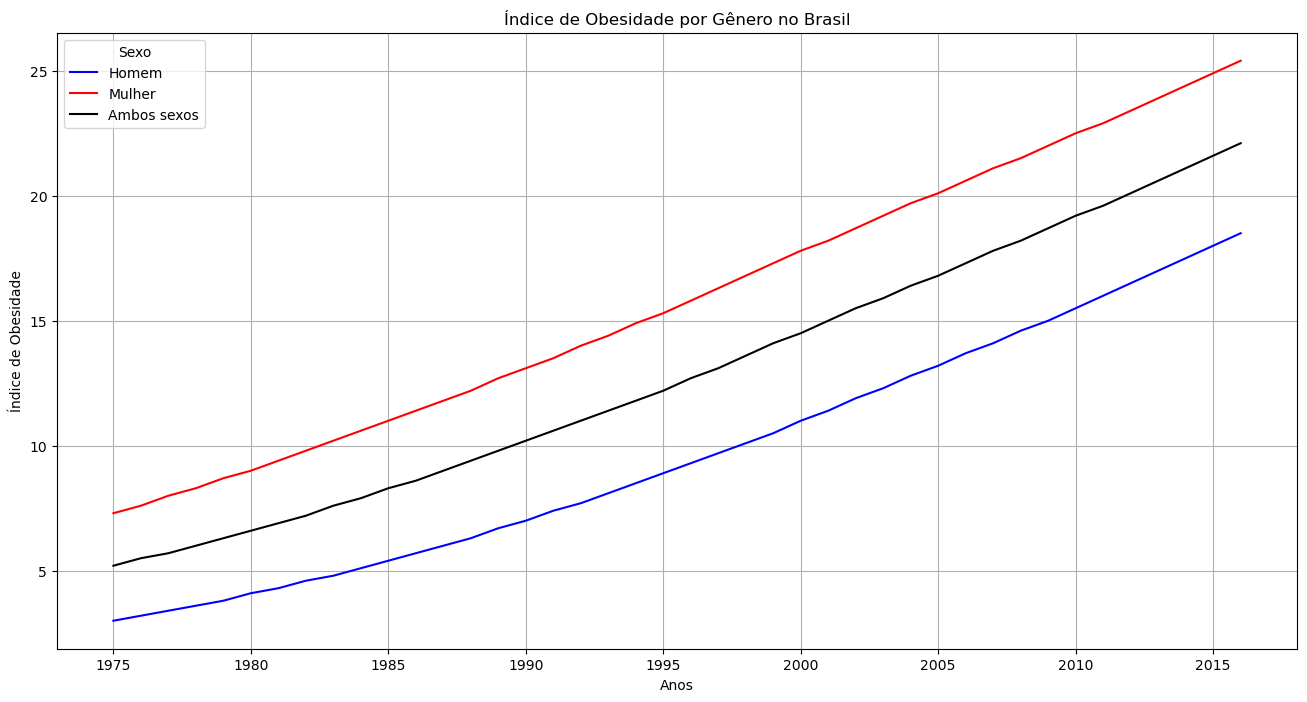

In [702]:

# Definindo cores para cada gênero
cores = {'Male': 'blue', 'Female': 'red', 'Both sexes': 'black'}

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 8))

# # Plotando a linha de obesidade para homens e mulheres
ax.plot(df_obesidade_brasil_homens['Anos'], df_obesidade_brasil_homens['Obesidade'], label='Homem', color=cores['Male'])
ax.plot(df_obesidade_brasil_mulheres['Anos'], df_obesidade_brasil_mulheres['Obesidade'], label='Mulher', color=cores['Female'])
ax.plot(df_obesidade_brasil_ambos_sexos['Anos'], df_obesidade_brasil_ambos_sexos['Obesidade'], label='Ambos sexos', color=cores['Both sexes'])


# # Adicionando título, rótulos dos eixos e legenda
ax.set_title('Índice de Obesidade por Gênero no Brasil')
ax.set_xlabel('Anos')
ax.set_ylabel('Índice de Obesidade')
plt.legend(title='Sexo')
ax.grid()

# Definindo os limites dos eixos X e Y
lim_x_max = df_obesidade_brasil['Anos'].max()
lim_x_min = df_obesidade_brasil['Anos'].min()

ax.set_xticks(range(lim_x_min, lim_x_max + 1, 5))



# Mostrando o gráfico
plt.show()

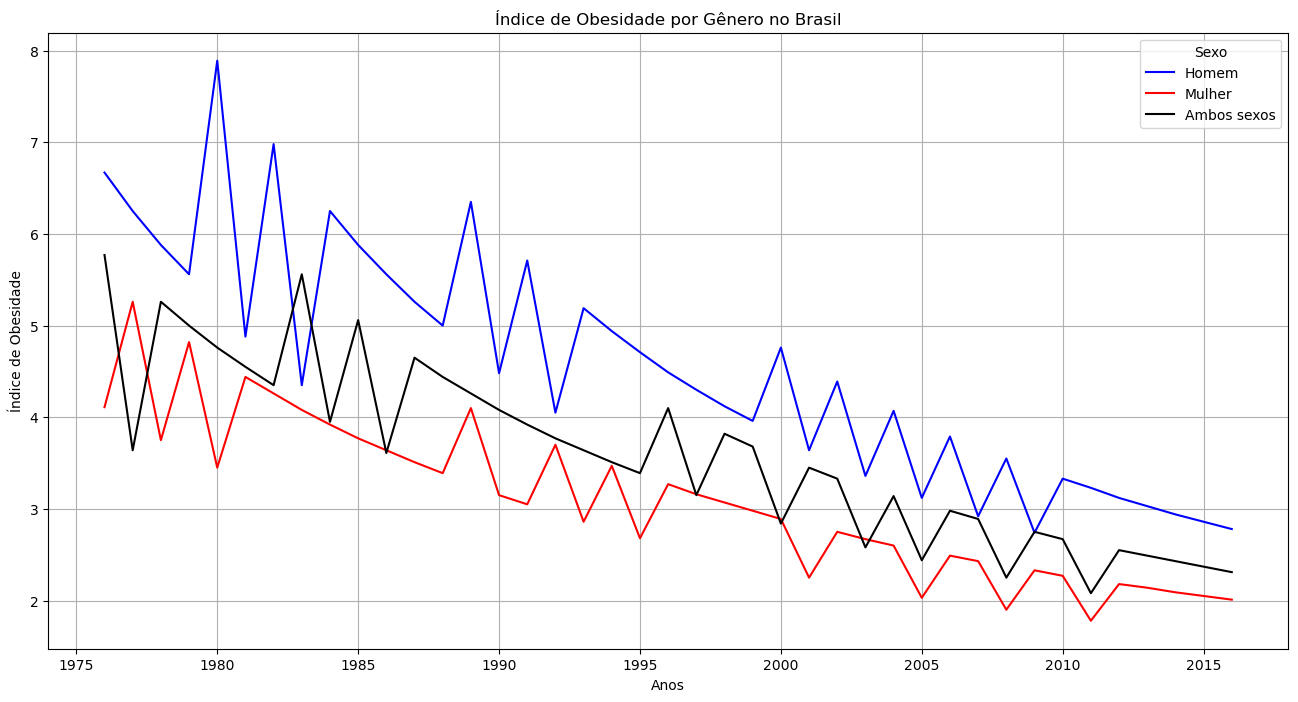

In [703]:
# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 8))

# Plotando a linha de obesidade para homens e mulheres
ax.plot(df_obesidade_brasil_homens['Anos'], df_obesidade_brasil_homens['Crescimento_obesidade'], label='Homem', color=cores['Male'])
ax.plot(df_obesidade_brasil_mulheres['Anos'], df_obesidade_brasil_mulheres['Crescimento_obesidade'], label='Mulher', color=cores['Female'])
ax.plot(df_obesidade_brasil_ambos_sexos['Anos'], df_obesidade_brasil_ambos_sexos['Crescimento_obesidade'], label='Ambos sexos', color=cores['Both sexes'])

# Adicionando título, rótulos dos eixos e legenda
ax.set_title('Índice de Obesidade por Gênero no Brasil')
ax.set_xlabel('Anos')
ax.set_ylabel('Índice de Obesidade')
plt.legend(title='Sexo')
ax.grid()

# Mostrando o gráfico
plt.show()

In [704]:
# Agrupando por sexo e tirando o percentual de crescimento de obesidade
df_obesidade_brasil['Crescimento_obesidade'] = df_obesidade_brasil.groupby('Sexo')['Obesidade'].pct_change() * 100

# Tirando media de crescimento
crescimento_medio_brasil = df_obesidade_brasil.groupby('Sexo')['Crescimento_obesidade'].mean().round()
crescimento_medio_brasil

Sexo
Both sexes    4.0
Female        3.0
Male          5.0
Name: Crescimento_obesidade, dtype: float64

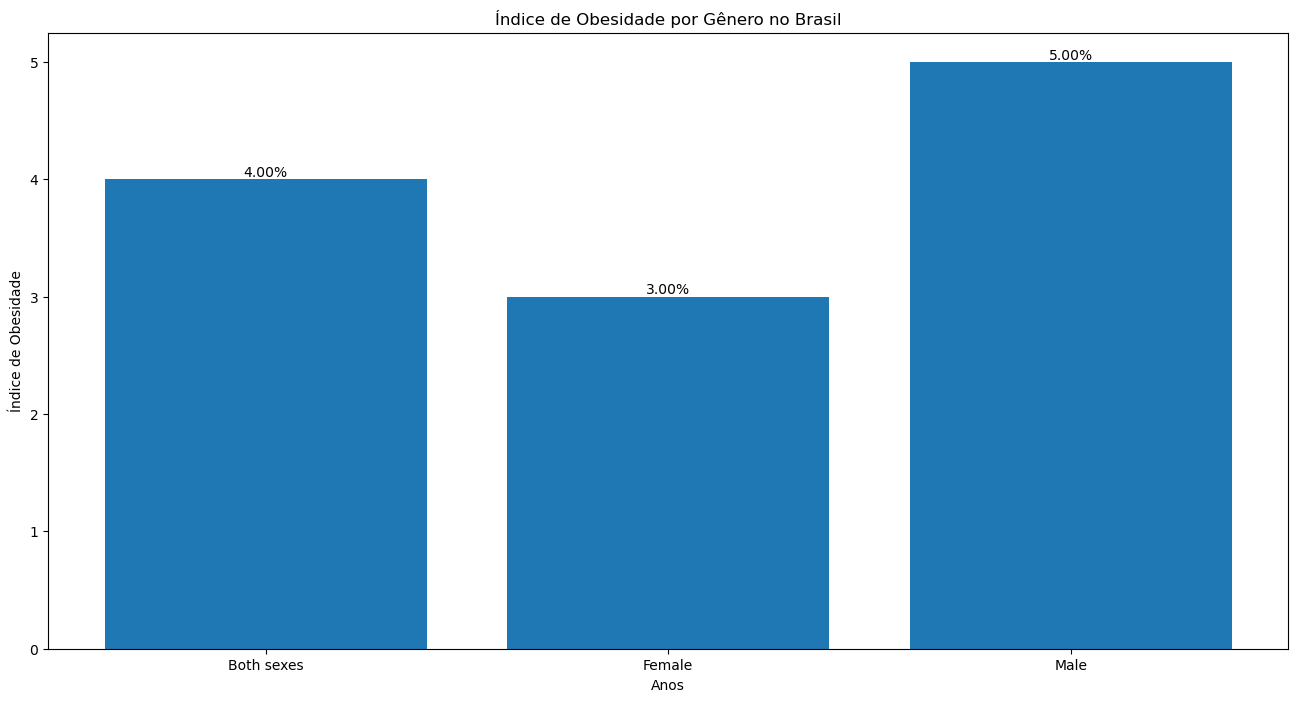

In [705]:

# Criando a figura e os eixos
fig, ax_media_crescimento_brasil = plt.subplots(figsize=(16, 8))

# Definindo barras do grafico
barras_media_crescimento_brasil = ax_media_crescimento_brasil.bar(crescimento_medio_brasil.index, crescimento_medio_brasil.values)

# Adicionando título, rótulos dos eixos e legenda
ax_media_crescimento_brasil.set_title('Índice de Obesidade por Gênero no Brasil')
ax_media_crescimento_brasil.set_xlabel('Anos')
ax_media_crescimento_brasil.set_ylabel('Índice de Obesidade')

# Valores em cima das barras
for barra in barras_media_crescimento_brasil:
    altura = barra.get_height()
    ax_media_crescimento_brasil.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

## Limpando DataFrame do pib

In [706]:
# Criando uma copia do DataFrame
df_pib_pp_limpa = df_pib_pp.copy()

df_pib_pp_limpa.rename(columns={'Country': 'Paises',
                                   'Region': 'Regiao',
                                   'Year': 'Anos',
                                   ' GDP_pp ': 'Pib_pp'}, inplace=True)

# Transformando tabela anos em datetime
df_pib_pp_limpa['Anos'] = pd.to_datetime(df_pib_pp_limpa['Anos']).dt.year

df_pib_pp_limpa['Regiao'] = df_pib_pp_limpa['Regiao'].astype(str)

# Formatando string de pib tirando espaços vazios e tirando virgula
df_pib_pp_limpa['Pib_pp'] = df_pib_pp_limpa['Pib_pp'].str.strip().str.replace(',', '')

# Transformando em números o pib
df_pib_pp_limpa['Pib_pp'] = pd.to_numeric(df_pib_pp_limpa['Pib_pp'], errors='coerce')

# Dando info
df_pib_pp_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Paises  4419 non-null   object 
 1   Regiao  4419 non-null   object 
 2   Anos    4419 non-null   int32  
 3   Pib_pp  4419 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 121.0+ KB


In [707]:
# Verificando valores NaN
df_pib_pp_limpa.isnull().sum()

Paises    0
Regiao    0
Anos      0
Pib_pp    0
dtype: int64

In [708]:
def fill_years(group):
    # Criar um range completo de anos
    full_years = pd.DataFrame({'Anos': range(group['Anos'].min(), group['Anos'].max() + 1)})
    # Merge com o grupo original para garantir todos os anos
    group = full_years.merge(group, on='Anos', how='left')
    # Preencher os valores de 'Paises' e 'Regiao'
    group['Paises'] = group['Paises'].ffill()
    group['Regiao'] = group['Regiao'].ffill()
    return group

# Aplicar o preenchimento para cada grupo de país e região
df_pib_pp_limpa = df_pib_pp_limpa.groupby(['Paises', 'Regiao'], group_keys=False).apply(fill_years)


df_pib_pp_limpa[df_pib_pp_limpa['Paises'] == 'United States']

,Anos,Paises,Regiao,Pib_pp
0,1901,United States,North America,7305.78
1,1902,United States,North America,NaN
2,1903,United States,North America,NaN
3,1904,United States,North America,NaN
4,1905,United States,North America,NaN
...,...,...,...,...
106,2007,United States,North America,NaN
107,2008,United States,North America,NaN
108,2009,United States,North America,NaN
109,2010,United States,North America,NaN


In [709]:
# Interpolando os valores ausentes
df_pib_pp_limpa['Pib_Interpolado'] = round(df_pib_pp_limpa['Pib_pp'].interpolate(), 2)

# Removendo coluna que não está interpolada
df_pib_pp_limpa = df_pib_pp_limpa.drop(columns=['Pib_pp'])

df_pib_pp_limpa[df_pib_pp_limpa['Paises'] == 'United States'].head(10)

,Anos,Paises,Regiao,Pib_Interpolado
0,1901,United States,North America,7305.78
1,1902,United States,North America,7485.71
2,1903,United States,North America,7665.64
3,1904,United States,North America,7845.56
4,1905,United States,North America,8025.49
5,1906,United States,North America,8205.42
6,1907,United States,North America,8166.48
7,1908,United States,North America,8127.54
8,1909,United States,North America,8088.59
9,1910,United States,North America,8049.65


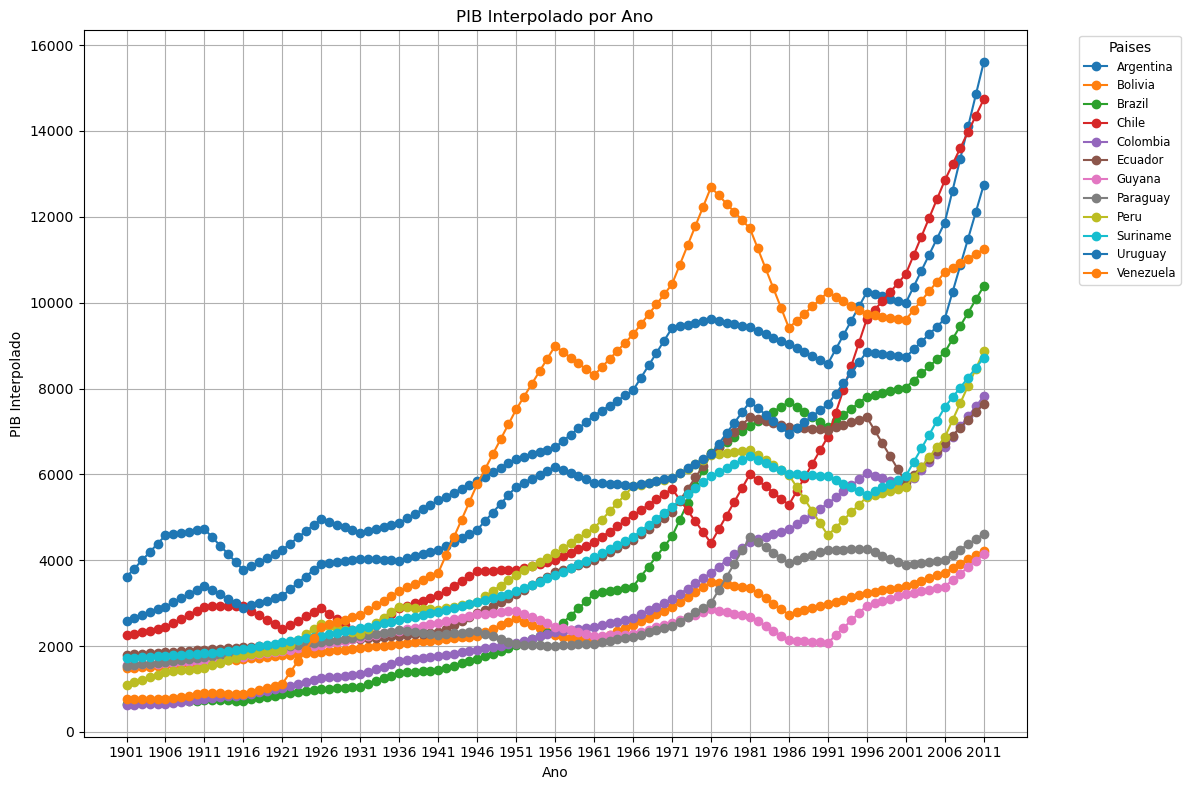

In [710]:
# Plotando o gráfico combinado para todos os países

paises_selecionados = df_pib_pp_limpa[df_pib_pp_limpa['Regiao'] == 'South America']
countries = paises_selecionados['Paises'].unique()
plt.figure(figsize=(12, 8))


for country in countries:
    country_data = df_pib_pp_limpa[df_pib_pp_limpa['Paises'] == country]
    plt.plot(country_data['Anos'], country_data['Pib_Interpolado'], marker='o', linestyle='-', label=country)

plt.title('PIB Interpolado por Ano')
plt.xlabel('Ano')
plt.ylabel('PIB Interpolado')
plt.grid(True)
plt.xticks(range(df_pib_pp_limpa['Anos'].min(), df_pib_pp_limpa['Anos'].max() + 1, 5))
plt.legend(title='Paises', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [711]:

# calcula a porcentagem de mudança
df_pib_pp_limpa['Crescimento_PIB'] = round(df_pib_pp_limpa.groupby('Regiao')['Pib_Interpolado'].pct_change() * 100, 2)
# calculando a média da coluna
crescimento_medio = df_pib_pp_limpa.groupby('Regiao')['Crescimento_PIB'].mean().round(2)

# Agrupa da maior taxa de crescimento
regioes_maior_crescimento = crescimento_medio.sort_values(ascending=False)
regioes_maior_crescimento

Regiao
North America                                    1.63
Middle East, North Africa, and Greater Arabia    1.37
Europe                                           1.32
Asia                                             1.15
Central America and the Caribbean                0.99
South America                                    0.97
Australia and Oceania                            0.94
Sub-Saharan Africa                               0.64
Name: Crescimento_PIB, dtype: float64

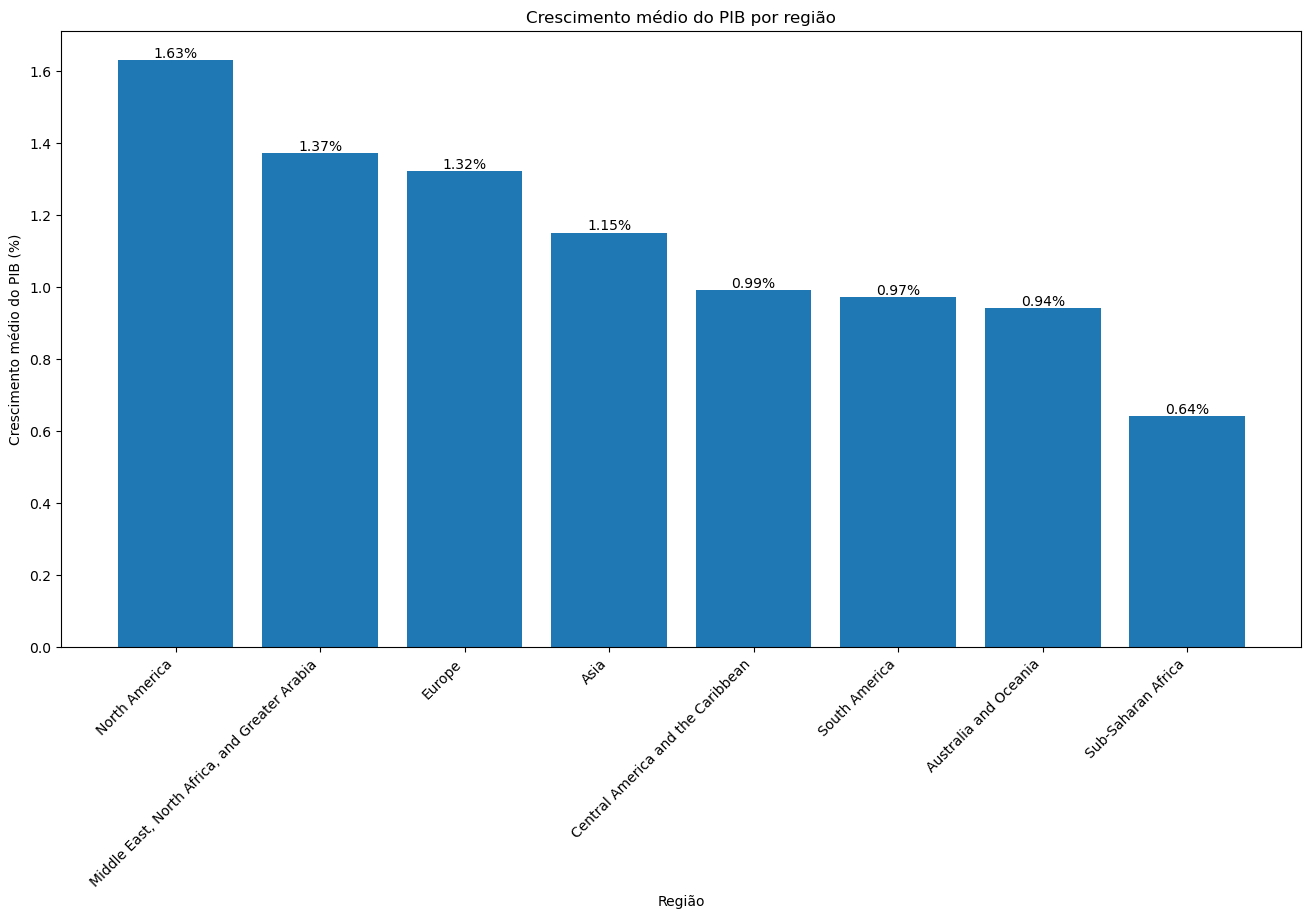

In [712]:
# Crie um gráfico de barras
fig, ax = plt.subplots(figsize=(16, 8))
barras_media_crescimento_pib_pp = plt.bar(regioes_maior_crescimento.index, regioes_maior_crescimento.values)

# Adicione títulos e rótulos
plt.title('Crescimento médio do PIB por região')
plt.xlabel('Região')
plt.ylabel('Crescimento médio do PIB (%)')
plt.xticks(fontsize=10, rotation=45, ha='right')

# Valores em cima das barras
for barra in barras_media_crescimento_pib_pp:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura,
                 '{:.2f}%'.format(altura), ha='center', va='bottom')


# Mostra o gráfico
plt.show()

In [713]:
df_obesidade_limpa_ambos = df_obesidade_limpa[df_obesidade_limpa['Sexo'] == 'Both sexes']

df_obesidade_pib = df_obesidade_limpa_ambos.merge(df_pib_pp_limpa, on=['Paises', 'Anos'], how='inner')
df_obesidade_pib.drop(columns=['Crescimento_PIB', 'Sexo'], axis=1 , inplace=True)
df_obesidade_pib.sort_values(by=['Paises','Anos'], inplace=True)
df_obesidade_pib

,Paises,Anos,Obesidade,Regiao,Pib_Interpolado
0,Afghanistan,1975,0.5,"Middle East, North Africa, and Greater Arabia",847.69
1,Afghanistan,1976,0.5,"Middle East, North Africa, and Greater Arabia",866.19
2,Afghanistan,1977,0.6,"Middle East, North Africa, and Greater Arabia",872.32
3,Afghanistan,1978,0.6,"Middle East, North Africa, and Greater Arabia",878.46
4,Afghanistan,1979,0.6,"Middle East, North Africa, and Greater Arabia",884.59
...,...,...,...,...,...
6016,Zimbabwe,2007,12.9,Sub-Saharan Africa,521.40
6017,Zimbabwe,2008,13.2,Sub-Saharan Africa,522.63
6018,Zimbabwe,2009,13.5,Sub-Saharan Africa,523.87
6019,Zimbabwe,2010,13.8,Sub-Saharan Africa,525.10


In [714]:
media_obesidade_pib = df_obesidade_pib.groupby('Regiao')[['Obesidade','Pib_Interpolado']].mean().round(2).reset_index()
media_obesidade_pib = media_obesidade_pib.sort_values('Regiao', ascending=True)
display(media_obesidade_pib)

,Regiao,Obesidade,Pib_Interpolado
0,Asia,4.22,5133.09
1,Australia and Oceania,24.39,7624.57
2,Central America and the Caribbean,12.42,7431.88
3,Europe,14.38,18080.20
4,"Middle East, North Africa, and Greater Arabia",16.34,14036.58
5,North America,18.71,24315.65
6,South America,13.69,6701.20
7,Sub-Saharan Africa,4.36,2450.51


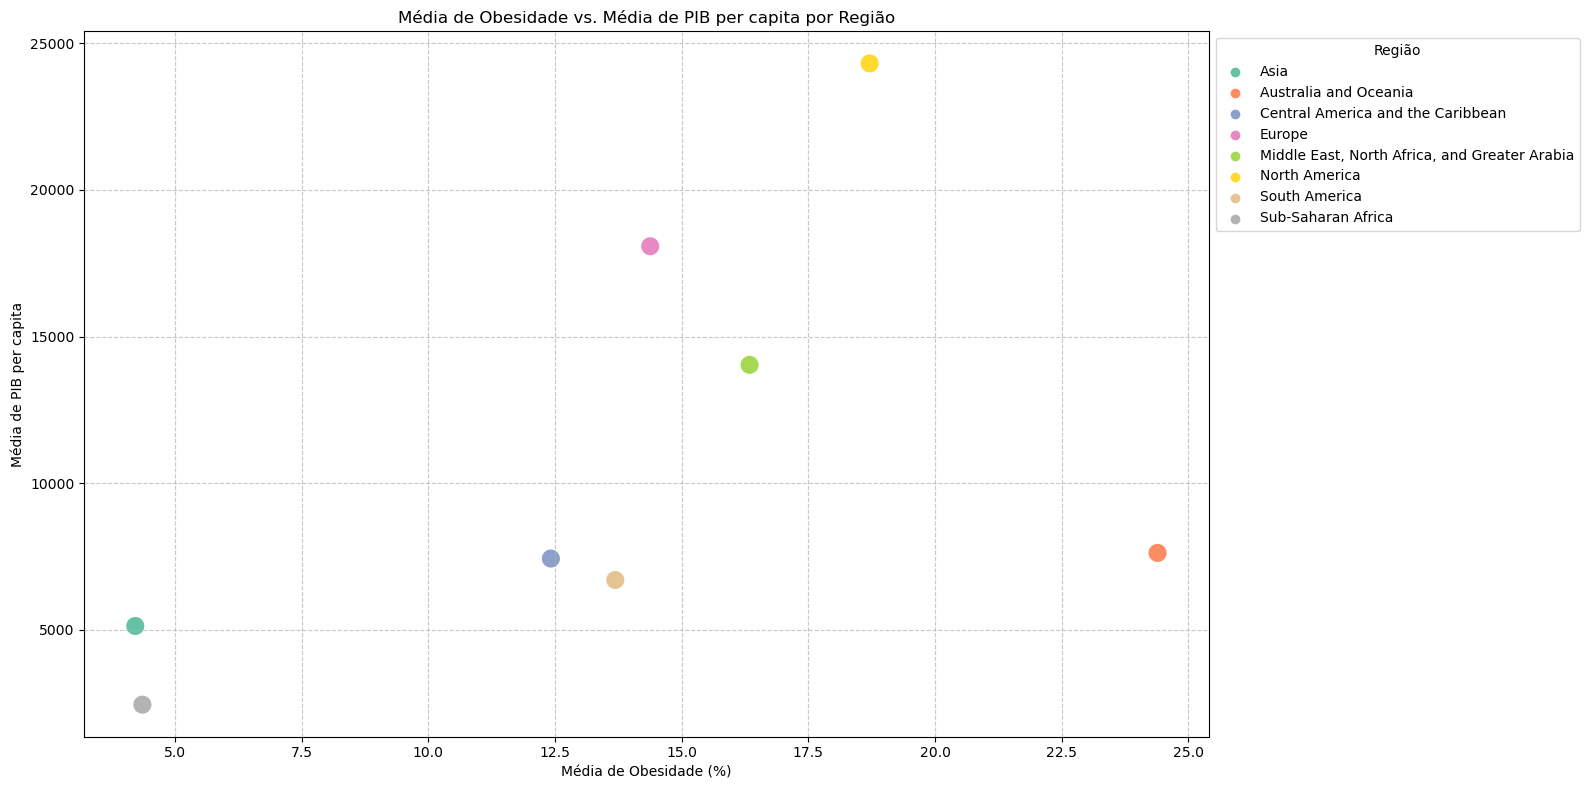

In [715]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'Obesidade', y = 'Pib_Interpolado', hue = 'Regiao', palette='Set2', data = media_obesidade_pib, s=200)
plt.title('Média de Obesidade vs. Média de PIB per capita por Região')
plt.xlabel('Média de Obesidade (%)')
plt.ylabel('Média de PIB per capita')
plt.grid(True, linestyle='--', alpha=0.7)

# Mover a legenda para a parte inferior do gráfico e ordenar
plt.legend(title='Região', bbox_to_anchor=(1, 1), loc='upper left')  

plt.tight_layout()
plt.show()

In [716]:
Paises = ['Brazil', 'United States', 'Portugal']

df_obesidade_Pib_Br_Us_Pt = df_obesidade_pib[df_obesidade_pib['Paises'].isin(Paises)]


media_obesidade_pib_paises_desejados = df_obesidade_Pib_Br_Us_Pt.groupby('Paises')[['Obesidade','Pib_Interpolado']].mean().round(2).reset_index()
media_obesidade_pib_paises_desejados = media_obesidade_pib_paises_desejados.sort_values('Paises', ascending=True)
display(media_obesidade_pib_paises_desejados)

,Paises,Obesidade,Pib_Interpolado
0,Brazil,11.77,7829.65
1,Portugal,11.23,15778.94
2,United States,21.32,34570.44


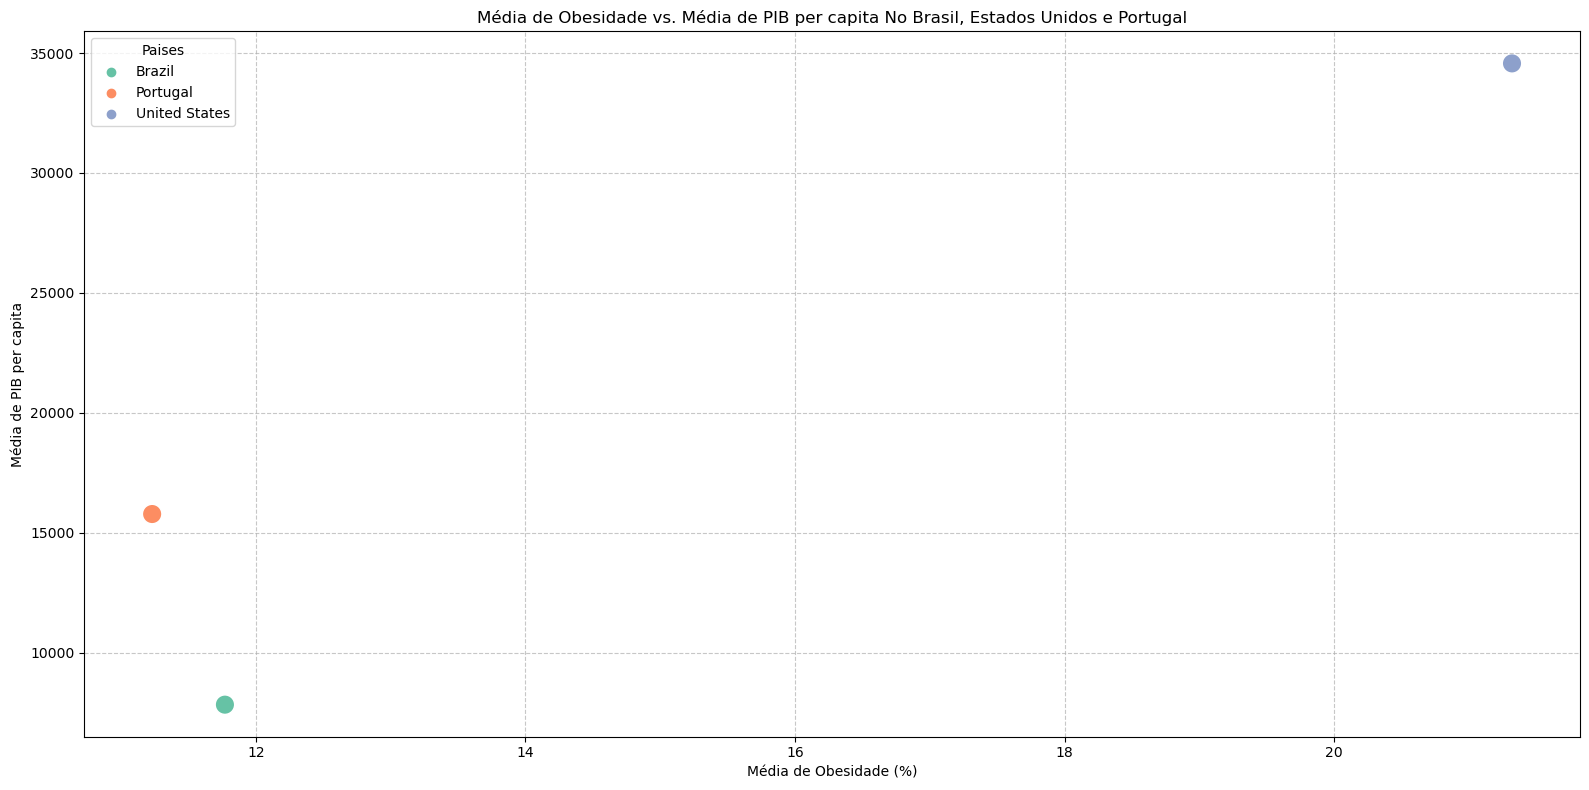

In [717]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'Obesidade', y = 'Pib_Interpolado', hue = 'Paises', palette='Set2', data = media_obesidade_pib_paises_desejados, s=200)
plt.title('Média de Obesidade vs. Média de PIB per capita No Brasil, Estados Unidos e Portugal')
plt.xlabel('Média de Obesidade (%)')
plt.ylabel('Média de PIB per capita')
plt.grid(True, linestyle='--', alpha=0.7)

# Mover a legenda para a parte inferior do gráfico e ordenar
plt.legend(title='Paises')  

plt.tight_layout()
plt.show()

In [718]:
media_obesidade_pib_paises = df_obesidade_pib.groupby('Paises')[['Obesidade','Pib_Interpolado']].mean().round(2).reset_index()
paises_mais_obesos = media_obesidade_pib_paises.sort_values('Obesidade', ascending=False).head(5)
paises_maiores_pib_pp = media_obesidade_pib_paises.sort_values('Pib_Interpolado', ascending=False).head(5)

df_comparacao_obeso_pib = pd.concat([paises_mais_obesos, paises_maiores_pib_pp], axis=0)
df_comparacao_obeso_pib.reset_index(drop=True,inplace=True)
display(df_comparacao_obeso_pib)

,Paises,Obesidade,Pib_Interpolado
0,Nauru,52.06,9313.70
1,Palau,40.44,16359.50
2,Marshall Islands,38.92,6284.69
3,Tonga,32.14,4041.24
4,Samoa,31.99,3942.18
5,Qatar,22.98,59675.43
6,Luxembourg,13.60,47705.79
7,Kuwait,26.85,40307.57
8,United Arab Emirates,19.77,36335.77
9,Norway,13.50,35541.74


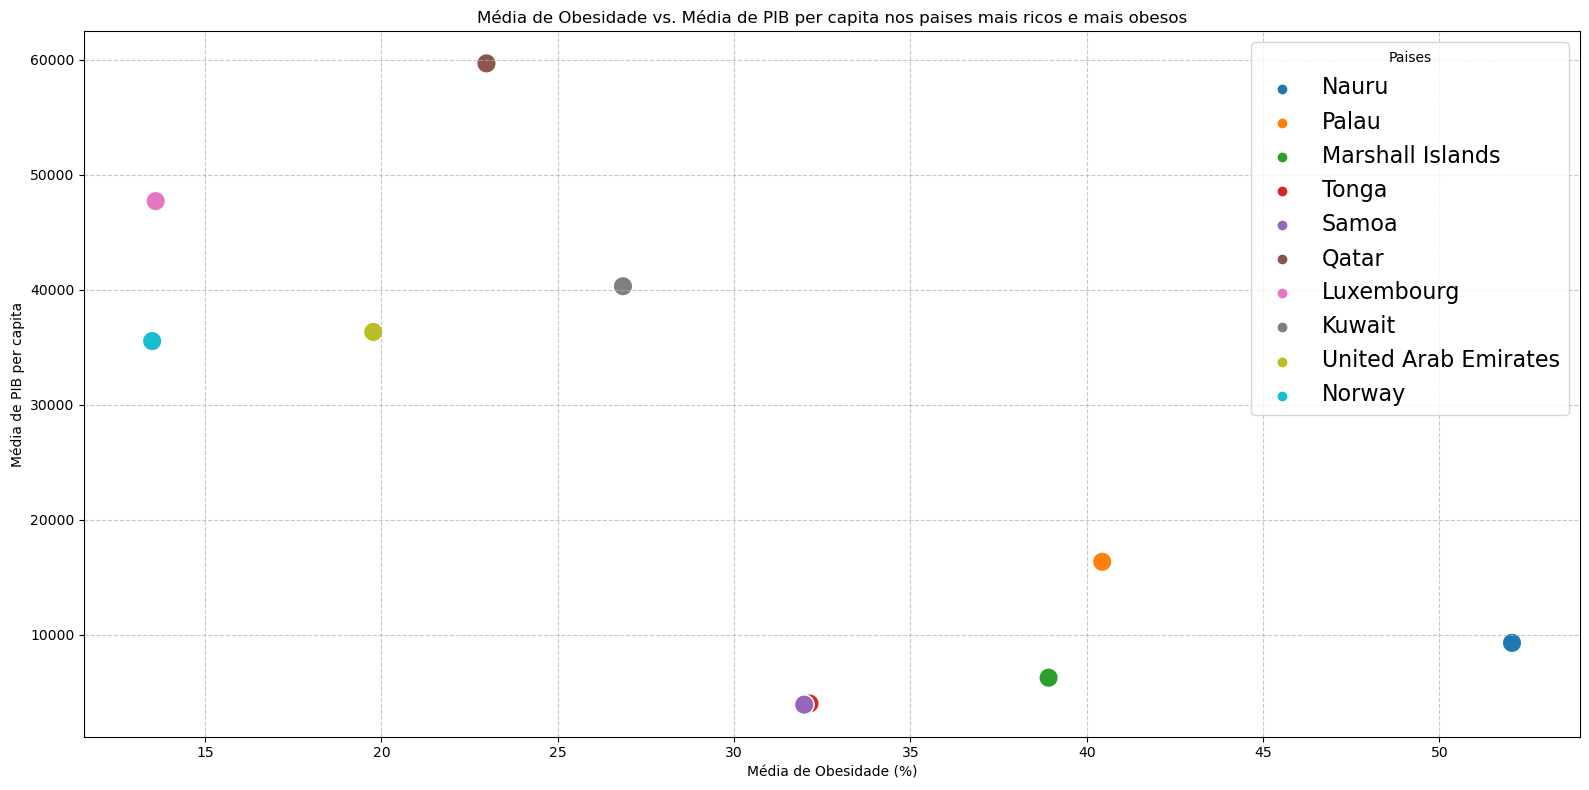

In [719]:

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'Obesidade', y = 'Pib_Interpolado', hue = 'Paises', data = df_comparacao_obeso_pib, s=200)
# Titulos, subTitulos
plt.title('Média de Obesidade vs. Média de PIB per capita nos paises mais ricos e mais obesos')
plt.xlabel('Média de Obesidade (%)')
plt.ylabel('Média de PIB per capita')
plt.grid(True, linestyle='--', alpha=0.7)

# Mover a legenda para a parte inferior do gráfico e ordenar
plt.legend(title='Paises', fontsize=16)

plt.tight_layout()
plt.show()